In [56]:
if 'thesis.Trajectory' in sys.modules: del sys.modules['thesis.Trajectory']
from thesis.Trajectory import Trajectory

if 'thesis.Aircraft' in sys.modules: del sys.modules['thesis.Aircraft']
from thesis.Aircraft import Aircraft

if 'thesis.Flight' in sys.modules: del sys.modules['thesis.Flight']
from thesis.Flight import Flight

if 'thesis.Scenario' in sys.modules: del sys.modules['thesis.Scenario']
from thesis.Scenario import Scenario

scene = Scenario()
with seed(0):
    scene.addRandomGroundUsersUniformCircular(10, r=1000) 
    
# X Y R Z
trajectory = Trajectory([
    (0, 10, 250, 1100),
    (2000, 0, 200, 1100),
    (2000, 2000, 300, 1130),
    (1000, 1000, 400, 1140),
    (0, 2000, 500, 1150),
    (1000, 3000, 400, 1160),
    (3000, 3000, 300, 1150),
    (2700, 1000, 250, 1130),
    (3000, -1000, 200, 1120)
])
    
craft = Aircraft(mass = 40)
alphas = [5 for p in trajectory.pieces]

flight = Flight(
    craft,
    trajectory,
    alphas,
    # From https://www.doubleradius.com/site/stores/baicells/baicells-nova-233-gen-2-enodeb-outdoor-base-station-datasheet.pdf
    #xmitPower = 30,
    #B = 5e6
    # From https://yatebts.com/products/satsite/
#     xmitPower = 43,
#     B = 5e6
    # From zeng
    xmitPower = 10,
    B = 1e6
)

trajectory.render() + point((0,0,0), size=50000)

Graphics3d Object

0, 24, 81, 122 min/avg/max/sum kb/J


41, 60, 81, 362 min/avg/max/sum kb/J


0, 57, 81, 343 min/avg/max/sum kb/J


70, 78, 87, 468 min/avg/max/sum kb/J


0, 70, 92, 422 min/avg/max/sum kb/J


66, 82, 92, 496 min/avg/max/sum kb/J



71, 85, 93, 511 min/avg/max/sum kb/J


84, 90, 96, 542 min/avg/max/sum kb/J


58, 87, 96, 524 min/avg/max/sum kb/J


0, 71, 96, 430 min/avg/max/sum kb/J


63, 85, 98, 511 min/avg/max/sum kb/J


60, 83, 98, 498 min/avg/max/sum kb/J


95, 98, 100, 588 min/avg/max/sum kb/J


0, 76, 100, 461 min/avg/max/sum kb/J


53, 85, 100, 511 min/avg/max/sum kb/J


77, 92, 103, 557 min/avg/max/sum kb/J


67, 92, 103, 552 min/avg/max/sum kb/J


81, 94, 103, 569 min/avg/max/sum kb/J


91, 98, 103, 589 min/avg/max/sum kb/J


67, 97, 105, 584 min/avg/max/sum kb/J

0.105846796928715 19.60102969260098 589.276393657014*(0.0135879209019851/pi + 0.00868156720687078)*abs(1/(-0.0000522525006043803/pi + 1.74677703863281)) + 1014.14231158460*(0.0605964857452378/pi + 0.0109515671962834)*abs(1/(-0.000354318948974434/pi + 3.69195759956246)) + 82.4045103528866*(0.0305867178918358/pi + 0.00934395126622289)*abs(1/(-0.000502473146245295/pi + 2.61517439477529)) + 380.636273996751*(0.0577381610848707/pi + 0.0107582695060054)*abs(1/(-0.000686345358120112/pi + 3.60229699503211)) + 618.900966613248*(0.0949846606720457/pi + 0.0148891549494734)*abs(1/(-0.000761609506370096/pi + 4.62235260462570)) + 364.378536408408*(0.0944105298565847/pi + 0.0147856194795249)*abs(1/(-0.000911920417248186/pi + 4.60812108842282)) + 848.467647972255*(0.132782486445783/pi + 0.0311823684693167)*abs(1/(-0.00105707739618289/pi + 5.46539090488088)) + 227.315643330679/pi + 0.0886071412722346*abs(316.9831711138223/pi - 42.63921276033507) + 0.08387059303469

Graphics3d Object

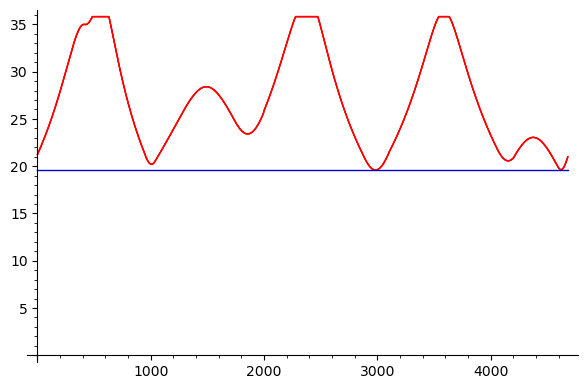

In [57]:
if 'thesis.EvalHelper' in sys.modules: del sys.modules['thesis.EvalHelper']
from thesis.EvalHelper import Judge
if 'thesis.Genetics' in sys.modules: del sys.modules['thesis.Genetics']
from thesis.Genetics import Chromosome, GARunner

j = Judge(scene, craft)

runner = GARunner(
    # Number of individuals
    5,
    # Generate new individual
    lambda: j.newChromosome(),
    # Fitness function
    lambda chromo: j.judgeChromosome(chromo)[0],
    # Per-bit probability of mutation in children
    pMutation = 0.05
)

from tqdm.notebook import tqdm

allFitness = []



for gen in tqdm(range(20)):
    fitnesses = runner.iterate(lambda x: tqdm(x, leave=False))
    print('%d, %d, %d, %d min/avg/max/sum kb/J' % (
        min(fitnesses)*1e3,
        sum(fitnesses) / len(fitnesses)*1e3,
        max(fitnesses)*1e3,
        sum(fitnesses)*1e3
    ))
    allFitness.append(fitnesses)
    
score, thru, meanFlightPower, cycleTime, positions, thruPlot = j.judgeChromosome(runner.population[0], dbg=True)
print(score, thru, meanFlightPower, cycleTime)
show(positions)
show(thruPlot)

105.846796928715 kb/J
19.60102969260098 min Mbps
185 W
4684 s


Graphics3d Object

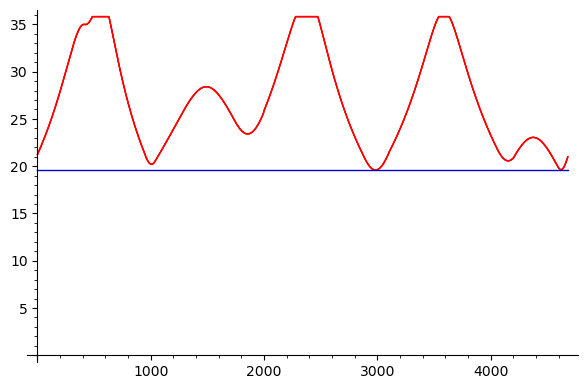

Graphics3d Object

In [58]:
score, thru, meanFlightPower, cycleTime, positions, thruPlot = j.judgeChromosome(runner.population[0], dbg=True)
print(score*1e3, 'kb/J')
print(thru, 'min Mbps')
print(round(meanFlightPower.n()), 'W')
print(round(cycleTime), 's')
show(positions)
show(thruPlot)
j.chromosomeToFlight(runner.population[0])._trajectory.render() + scene.render()

In [59]:
if 'thesis.simulation' in sys.modules: del sys.modules['thesis.simulation']
from ns.core import Vector, MilliSeconds, Seconds
from thesis.simulation import SimulationContext
import ns.mobility
from ns.mobility import PathMobilityModelSegments as Seg
import ns.flow_monitor

flh = ns.flow_monitor.FlowMonitorHelper()

with SimulationContext() as sim:
    sim.addEnbFlight(j.chromosomeToFlight(runner.population[0]))
    
    # For testing a straight-away path
    #mobile = ns.mobility.PathMobilityModel()
    #mobile.AddSegment(ns.mobility.PathMobilityModelSegments.LineSegment(ns.core.Vector(2000, 0, 0), ns.core.Vector(10000, 0, 0), 100))
    #sim.enbMobilities.append(mobile)
        
    #sim.addEnbFlight(flight)
    for user in scene.users:
        sim.addUser(*user)
    sim._finalizeNodes()
    
    MbpsPerDirectionTarget = 50 * 1024 * 1024
    packetSize = 1024 * 8
    packetsPerSecond = MbpsPerDirectionTarget / packetSize
    interval = 1 / packetsPerSecond * 1e6
    
    print('interval is', interval)
    
    for idx in range(len(scene.users)):
        sim.createTrafficGenerator(idx, False, interval = int(interval+1))
        #sim.createTrafficGenerator(idx, True, interval = int(interval+1))
        
    sim.lteHelper.EnableRlcTraces()
    flh.InstallAll()
    
    
    dt = int(2000)
    
    sim.startAndMonitorApps(resolution = 10)
    sim.stopAppsAt(dt)
    
    sim.run(dt + 10)
    
    rx = [
        sim.serverApps.Get(idx).GetTotalRx()
        for idx
        in range(sim.serverApps.GetN())
    ]
    
    print(round(sum(rx) / dt / 1e6 * 8, 2), 'Mbps', rx)
    print(sim.serverAppStats)

interval is 156.250000000000
7.0.0.2


14.56 Mbps [3641146368]
[[0], [13357056], [13393920], [13394944], [13394944], [14673920], [15694848], [15694848], [15694848], [15694848], [15695872], [15694848], [15694848], [15694848], [17403904], [17790976], [17790976], [18119680], [20842496], [21261312], [21282816], [21284864], [21284864], [21284864], [21284864], [21284864], [21284864], [21284864], [21284864], [21284864], [21284864], [21284864], [21284864], [21284864], [21284864], [21284864], [21284864], [21284864], [21284864], [21284864], [21284864], [21284864], [21284864], [21284864], [21284864], [21284864], [21285888], [21284864], [21284864], [21284864], [21284864], [21284864], [21284864], [21284864], [21284864], [21284864], [21284864], [21284864], [21284864], [21284864], [21284864], [21284864], [21284864], [21284864], [21284864], [21284864], [21284864], [21284864], [21284864], [21284864], [21284864], [21284864], [21284864], [21284864], [21284864], [21284864], [21284864], [21284864], [21282816], [21203968], [19580928], [17792000]

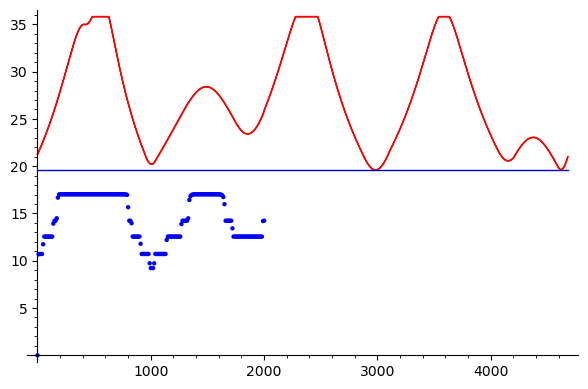

In [64]:
import numpy as np
rates = np.array(sim.serverAppStats) / 1e6 * 8 / 10
meanRates = np.sum(rates, 1)
#list_plot( plotjoined = True)
list_plot([(i * 10, meanRates[i]) for i in range(len(meanRates))]) + thruPlot

In [31]:
q=flh.GetMonitor()
print(q.SerializeToXmlString(2, True, False))

  <FlowMonitor>
    <FlowStats>
      <Flow flowId="1" timeFirstTxPacket="+0ns" timeFirstRxPacket="+2.9e+07ns" timeLastTxPacket="+3.13e+11ns" timeLastRxPacket="+3.13027e+11ns" delaySum="+1.78004e+13ns" jitterSum="+3.70829e+11ns" lastDelay="+2.7626e+07ns" txBytes="1052000000" rxBytes="684431200" txPackets="1000000" rxPackets="650600" lostPackets="349400" timesForwarded="650600">
        <delayHistogram nBins="31" >
          <bin index="26" start="0.026" width="0.001" count="200954" />
          <bin index="27" start="0.027" width="0.001" count="443900" />
          <bin index="28" start="0.028" width="0.001" count="5740" />
          <bin index="29" start="0.029" width="0.001" count="5" />
          <bin index="30" start="0.03" width="0.001" count="1" />
        </delayHistogram>
        <jitterHistogram nBins="2" >
          <bin index="0" start="0" width="0.001" count="650597" />
          <bin index="1" start="0.001" width="0.001" count="2" />
        </jitterHistogram>
        <pac

In [2]:
rx = [
    sim.serverApps.Get(idx).GetTotalRx()
    for idx
    in range(sim.serverApps.GetN())
]

round(sum(rx) / 10 / 1e6, 2), 'Mbps'

(0.0, 'Mbps')

In [14]:
cnt = {}
for i in ns.core.Simulator.getCounts():
    n, t = i.split(':')
    cnt[n] = t

for i in ns.core.Simulator.getTiming():
    n, t = i.split(':')
    if int(t) > 1000:
        # Thing, milliseconds, count, us/execution
        print(i, cnt[n], 1000 * float(t) / float(cnt[n]))
        
        

PN3ns314LteSpectrumPhyE.MN3ns314LteSpectrumPhyEFvvE:6443 336866 19.126299478130772
PN3ns38LteUePhyE.MN3ns38LteUePhyEFvjjE:1358 150000 9.053333333333333
PN3ns39LteEnbPhyE.MN3ns39LteEnbPhyEFvvE:1753 31496 55.657861315722634
PN3ns39UdpClientE.MN3ns39UdpClientEFvvE:12673 1500000 8.448666666666666
